In [1]:
### Import Libraries

import pandas as pd
import tweepy as tw
import re

In [2]:
### Set Tweepy API creds

my_api_key = ''
my_api_secret = ''

In [3]:
### Authorise API 

auth = tw.OAuthHandler(my_api_key,my_api_secret )
api = tw.API(auth, wait_on_rate_limit=True)

In [4]:
### Set SEARCH query

search_query = "MsMarvel -filter:retweets"
count = 1000

In [5]:
### Extract Tweets

tweets = tw.Cursor(api.search,
                  q=search_query,
                  lang="en",
                  since="2022-06-08").items(5000)

tweets_copy = []

for tweet in tweets:
    tweets_copy.append(tweet)
    
print("Total tweets: ",len(tweets_copy))

Total tweets:  5000


In [6]:
### Create Dataframe


# intialize the dataframe
tweets_df = pd.DataFrame()

# populate the dataframe
for tweet in tweets_copy:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.id, 
                                               'user_location': tweet.user.location,\
                                               #'user_description': tweet.user.description,
                                               #'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None]}))
                                               #'source': tweet.source}))
    tweets_df = tweets_df.reset_index(drop=True)

In [7]:
### Size of Dataframe

tweets_df.shape

(5000, 5)

In [3]:
### Display first few rows of Dataframe

tweets_df.head()

,user_name,user_location,date,text,hashtags
0,1551849906658496512,New Zealand,2022-07-26 08:40:24,Just finished #MsMarvel ... I gotta say I am n...,['MsMarvel']
1,1551849587002191873,UK,2022-07-26 08:39:08,‘Marvel making a series with a Pakistani Musli...,NaN
2,1551844102282432513,NaN,2022-07-26 08:17:20,PART 75 - #Marvel #MarvelStudios #MsMarvel htt...,"['Marvel', 'MarvelStudios', 'MsMarvel']"
3,1551843790356467713,NaN,2022-07-26 08:16:06,Another beautiful click from memorable premier...,"['MehwishHayat', 'LNJ', 'MsMarvel', 'Aisha']"
4,1551843292245118976,NaN,2022-07-26 08:14:07,Mehwish Shared This Beautiful Pic From Los Ang...,NaN


In [10]:
### Save the Dataframe to .csv file

tweets_df.to_csv("Ms-Marvel-Tweets.csv",index=False)

In [2]:
### Read teh Dataframe 

tweets_df = pd.DataFrame()

tweets_df = pd.read_csv("Ms-Marvel-Tweets.csv")



In [4]:
### Dataframe information

tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_name      5000 non-null   int64 
 1   user_location  3466 non-null   object
 2   date           5000 non-null   object
 3   text           5000 non-null   object
 4   hashtags       3304 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB


In [298]:
#tweets_df['hashtags'] = tweets_df['hashtags'].apply(eval)

#def to_1D(series):
    #return pd.Series([x for _list in series for x in _list])

#to_1D(tweets_df['hashtags']).value_counts()

CLEAN THE TWEETS    

In [58]:
### Replace quotes

rp_quote = lambda x: re.sub("’","'",x)
tweets_df['text'] = tweets_df['text'].map(rp_quote)

In [59]:
### Lower case -1

tweets_df['clean_tweet'] = tweets_df['text'].str.lower()

In [60]:
### Remove Hash tags & mentions-2

rm_hash = lambda x: re.sub("#[a-zA-Z0-9_]+","",x)
rm_mention = lambda x: re.sub("@[a-zA-Z0-9_]+","",x)

tweets_df['clean_tweet'] = tweets_df['clean_tweet'].map(rm_hash).map(rm_mention)

In [61]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he shall",
"he'll've": "he shall have",
"he's": "he has",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has",
"i'd": "i had",
"i'd've": "i would have",
"i'll": "i shall",
"i'll've": "i shall have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it shall",
"it'll've": "it shall have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she shall",
"she'll've": "she shall have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they shall",
"they'll've": "they shall have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall",
"what'll've": "what shall have",
"what're": "what are",
"what's": "wwhat is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who shall",
"who'll've": "who shall have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you shall",
"you'll've": "you shall have",
"you're": "you are",
"you've": "you have"
}

In [62]:
### Expand contractions

def expand_contrac(x):
    for key in contractions:
        value=contractions[key]
        x=x.replace(key,value)
    return x

tweets_df['clean_tweet'] = tweets_df['clean_tweet'].apply(expand_contrac)

In [63]:
### Remove links-3

rm_link = lambda x:re.sub(r"http\S+","",x)
rm_web = lambda x: re.sub(r"www.[\S.]+","",x)

tweets_df['clean_tweet'] = tweets_df['clean_tweet'].map(rm_link).map(rm_web)

In [64]:
### Remove punctuations - 4

rm_punc = lambda x: re.sub("[()?!:/']"," ",x)
rm_punc2 = lambda x: re.sub("\[.*?\]"," ",x)

tweets_df['clean_tweet'] = tweets_df['clean_tweet'].map(rm_punc).map(rm_punc2)


In [65]:
### Remove non alpha characters - 5

rm_nonalpha = lambda x: re.sub("[^a-z0-9]"," ",x)
tweets_df['clean_tweet'] = tweets_df['clean_tweet'].map(rm_nonalpha)

In [22]:
### Remove stop words

import nltk
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

## custom STOP words list
STOPWORDS2 = ['marvel','s','m','mcu','show','episode','season','amp','ms','gt','msmarvel']

def rm_stopwords(text):
    text = [word for word in text.split(' ') if word not in STOPWORDS]
    text = " ".join(text)
    text = [word for word in text.split(' ') if word not in STOPWORDS2]
    text = " ".join(text)
    return text

tweets_df['clean_tweet'] = tweets_df['clean_tweet'].apply(rm_stopwords) 

In [9]:
pd.set_option('max_colwidth',6000)

In [66]:
tweets_df.loc[0:30,['text','clean_tweet']]

,text,clean_tweet
0,Just finished #MsMarvel ... I gotta say I am not the biggest fan.\n\nMy rating for the episodes are:\nEp.1 7/10\nEp.2 6/10\nEp.3 3/10\nEp.4 6/10\nEp.5 6.5/10\nEp.6 8.5/10\n\nOverall rating 6/10\nThis was probably my least favorite series (close behind falcon and the winter soldier. https://t.co/CgyR81K72N,just finished i gotta say i am not the biggest fan my rating for the episodes are ep 1 7 10 ep 2 6 10 ep 3 3 10 ep 4 6 10 ep 5 6 5 10 ep 6 8 5 10 overall rating 6 10 this was probably my least favorite series close behind falcon and the winter soldier
1,‘Marvel making a series with a Pakistani Muslim girl at the centre is very unique:' Farhan Akhtar on working on Ms Marvel\n#marvelseries #farhanakhtar #msmarvel #RussoBrothers #TheGrayMan #EntertainmentStories #headlinestory #UK #news\nhttps://t.co/a9Z77falSe https://t.co/G7JMp4piYW,marvel making a series with a pakistani muslim girl at the centre is very unique farhan akhtar on working on ms marvel
2,PART 75 - #Marvel #MarvelStudios #MsMarvel https://t.co/737YPTFUVv,part 75
3,Another beautiful click from memorable premiere night of LNJ at Los Angeles 🎉\n#MehwishHayat #LNJ \n#MsMarvel #Aisha \n#LondonNahiJaunga https://t.co/mVmpP4YUVw,another beautiful click from memorable premiere night of lnj at los angeles
4,Mehwish Shared This Beautiful Pic From Los Angeles premiere and promotions of LNJ with a caption a night to remember. \n#MehwishHayat \n#LNJ #Aisha #MsMarvel \n#LondonNahiJaunga https://t.co/1squ9voEPQ,mehwish shared this beautiful pic from los angeles premiere and promotions of lnj with a caption a night to remember
5,PART 74 - #Marvel #MarvelStudios #MsMarvel https://t.co/sViG8lqLBZ,part 74
6,Their have been a few new #dccomics and #Marvel TV shows this year that are good ideas for us here at #Glastonburyfurniturecompany to make a special gift for someone. So get in touch.😁\n#MsMarvel #MoonKnight #Peacemaker and #SupermanAndLois \n#Glastonbury #SOMERSET #Mendip https://t.co/TVRR8qgQJJ,their have been a few new and tv shows this year that are good ideas for us here at to make a special gift for someone so get in touch and
7,MS.MARVEL SEASON FINALE REVIEW/RECAP - MARVELous Bluntz https://t.co/mNm1uyP5Lq via @YouTube #MsMarvel,ms marvel season finale review recap marvelous bluntz via
8,PART 73 - #Marvel #MarvelStudios #MsMarvel https://t.co/MdQAQhiW1y,part 73
9,PART 72 - #Marvel #MarvelStudios #MsMarvel https://t.co/genNqxn8zQ,part 72


In [25]:
### Extract the sentiment of tweet
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

sentiment_score_list = []
sentiment_label_list = []

for i in tweets_df['clean_tweet'].values.tolist():
    sentiment_score = analyser.polarity_scores(i)

    if sentiment_score['compound'] >= 0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Positive')
    elif sentiment_score['compound'] > -0.05 and sentiment_score['compound'] < 0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Neutral')
    elif sentiment_score['compound'] <= -0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Negative')
    
tweets_df['sentiment'] = sentiment_label_list
tweets_df['sentiment score'] = sentiment_score_list

In [26]:
### Visualize the sentiment

sentiment_df = pd.DataFrame(tweets_df['sentiment'].value_counts().reset_index(name='count'))

In [27]:
sentiment_df

,index,count
0,Positive,2799
1,Neutral,1536
2,Negative,665


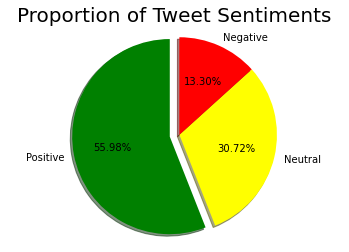

In [28]:
### Plot a Pie Chart

import matplotlib.pyplot as plt
color = ['green','yellow','red']
explode = (0.1,0,0)
fontsize=20
plt.title('Proportion of Tweet Sentiments',fontdict={"fontsize":fontsize})
plt.pie(sentiment_df['count'],labels=sentiment_df['index'],autopct='%.2f%%',
        colors=color,explode=explode,shadow=True,startangle=90)
plt.axis('equal')
plt.show()

(-0.5, 799.5, 499.5, -0.5)

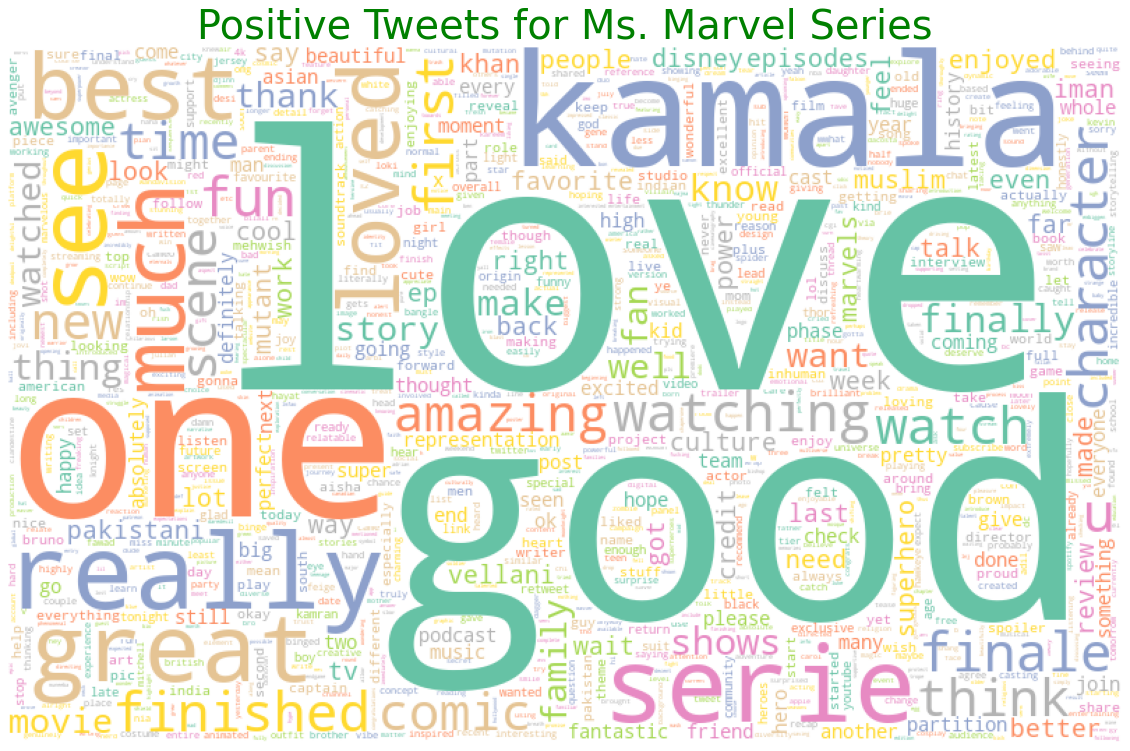

In [34]:
### Plot a WordCloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

data_pos = tweets_df[tweets_df['sentiment'] == 'Positive']['clean_tweet']

plt.figure(figsize=[20,20])
fontsize=40
plt.title('Positive Tweets for Ms. Marvel Series',fontdict={"fontsize":fontsize,"color":'green'})

wc = WordCloud(max_words = 1000,background_color='white',colormap='Set2',
               width=800,height=500,collocations=False).generate(" ".join(data_pos))
            
plt.imshow(wc)
plt.axis("off")

Top Hashtags in Tweets

In [35]:
tweets_df['hashtags'].isnull().sum()

1696

In [36]:
tweets_df['hashtags'].fillna("[]",inplace=True)

In [43]:
#tweets_df['hashtags'] = tweets_df['hashtags'].apply(eval)

def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

hash_df = pd.DataFrame(to_1D(tweets_df['hashtags']).value_counts().sort_values(ascending=False).reset_index(name='count'))

In [49]:
hash_df.loc[:10,]

,index,count
0,MsMarvel,2752
1,msmarvel,197
2,MCU,149
3,Marvel,129
4,KamalaKhan,85
5,MarvelStudios,82
6,DisneyPlus,71
7,TheMarvels,58
8,SDCC,55
9,ImanVellani,50


EXTRACT THE NOUN ADJECTIVE PAIR IN TWEETS

In [71]:
import spacy
nlp = spacy.load('en_core_web_sm')

def get_tweet_pair(tweet):
    doc = nlp(tweet)

    noun_adj_pairs = {}
    for chunk in doc.noun_chunks:
        adj = []
        noun = ""
        for tok in chunk:
            if tok.pos_ == "NOUN":
                noun = tok.text
            if tok.pos_ == "ADJ":
                adj.append(tok.text)
        if noun:
            noun_adj_pairs.update({noun:adj})
            
    return noun_adj_pairs


In [72]:
tweets_df['tweet_pair'] = tweets_df['clean_tweet'].apply(get_tweet_pair)

In [83]:
tweets_df.loc[:40,['clean_tweet','tweet_pair','sentiment']]

,clean_tweet,tweet_pair,sentiment
0,just finished i gotta say i am not the biggest fan my rating for the episodes are ep 1 7 10 ep 2 6 10 ep 3 3 10 ep 4 6 10 ep 5 6 5 10 ep 6 8 5 10 overall rating 6 10 this was probably my least favorite series close behind falcon and the winter soldier,"{'fan': ['biggest'], 'rating': ['overall'], 'episodes': [], 'series': ['least', 'favorite'], 'falcon': [], 'soldier': []}",Neutral
1,marvel making a series with a pakistani muslim girl at the centre is very unique farhan akhtar on working on ms marvel,"{'marvel': ['ms'], 'series': [], 'girl': ['pakistani', 'muslim'], 'centre': [], 'akhtar': ['unique', 'farhan']}",Neutral
2,part 75,{'part': []},Neutral
3,another beautiful click from memorable premiere night of lnj at los angeles,"{'click': ['beautiful'], 'night': ['memorable', 'premiere']}",Positive
4,mehwish shared this beautiful pic from los angeles premiere and promotions of lnj with a caption a night to remember,"{'pic': ['beautiful'], 'premiere': [], 'promotions': [], 'caption': []}",Positive
5,part 74,{'part': []},Neutral
6,their have been a few new and tv shows this year that are good ideas for us here at to make a special gift for someone so get in touch and,"{'tv': ['few', 'new'], 'ideas': ['good'], 'gift': ['special'], 'touch': []}",Positive
7,ms marvel season finale review recap marvelous bluntz via,"{'recap': [], 'bluntz': ['marvelous']}",Positive
8,part 73,{'part': []},Neutral
9,part 72,{'part': []},Neutral
